# IEEEG1NL: Nonlinear Valve Position - Steam Flow, and Linearized Thermal Storage

In [1]:
import matplotlib.pyplot as plt

import andes

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(30)

In [4]:
s1 = andes.load(andes.get_case('kundur/kundur_ieeeg1.xlsx'),
                setup=False, no_output=True, default_config=True)
s2 = andes.load(andes.get_case('kundur/kundur_ieeeg1nl.xlsx'),
                setup=False, no_output=True, default_config=True)

for ss in [s1, s2]:

    ss.Toggle.alter(src='u', idx=1, value=0)

    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_0', src='Ppf',
                           attr='v', method='+', amount=0.5))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                           attr='v', method='+', amount=0.5))

    ss.setup()

for ss in [s1, s2]:
    # Constant load
    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    ss.PFlow.run()

In [5]:
for ss in [s1, s2]:
    _ = ss.TDS.init()

In [6]:
for ss in [s1, s2]:
    ss.TDS.config.tf = 300
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True
    ss.TDS.run()

<Alter Alter_2>: set PQ.PQ_0.Ppf.v=12.09 at t=1. Previous value was 11.59.
<Alter Alter_3>: set PQ.PQ_1.Ppf.v=16.25 at t=1. Previous value was 15.75.
<Alter Alter_2>: set PQ.PQ_0.Ppf.v=12.09 at t=1. Previous value was 11.59.
<Alter Alter_3>: set PQ.PQ_1.Ppf.v=16.25 at t=1. Previous value was 15.75.


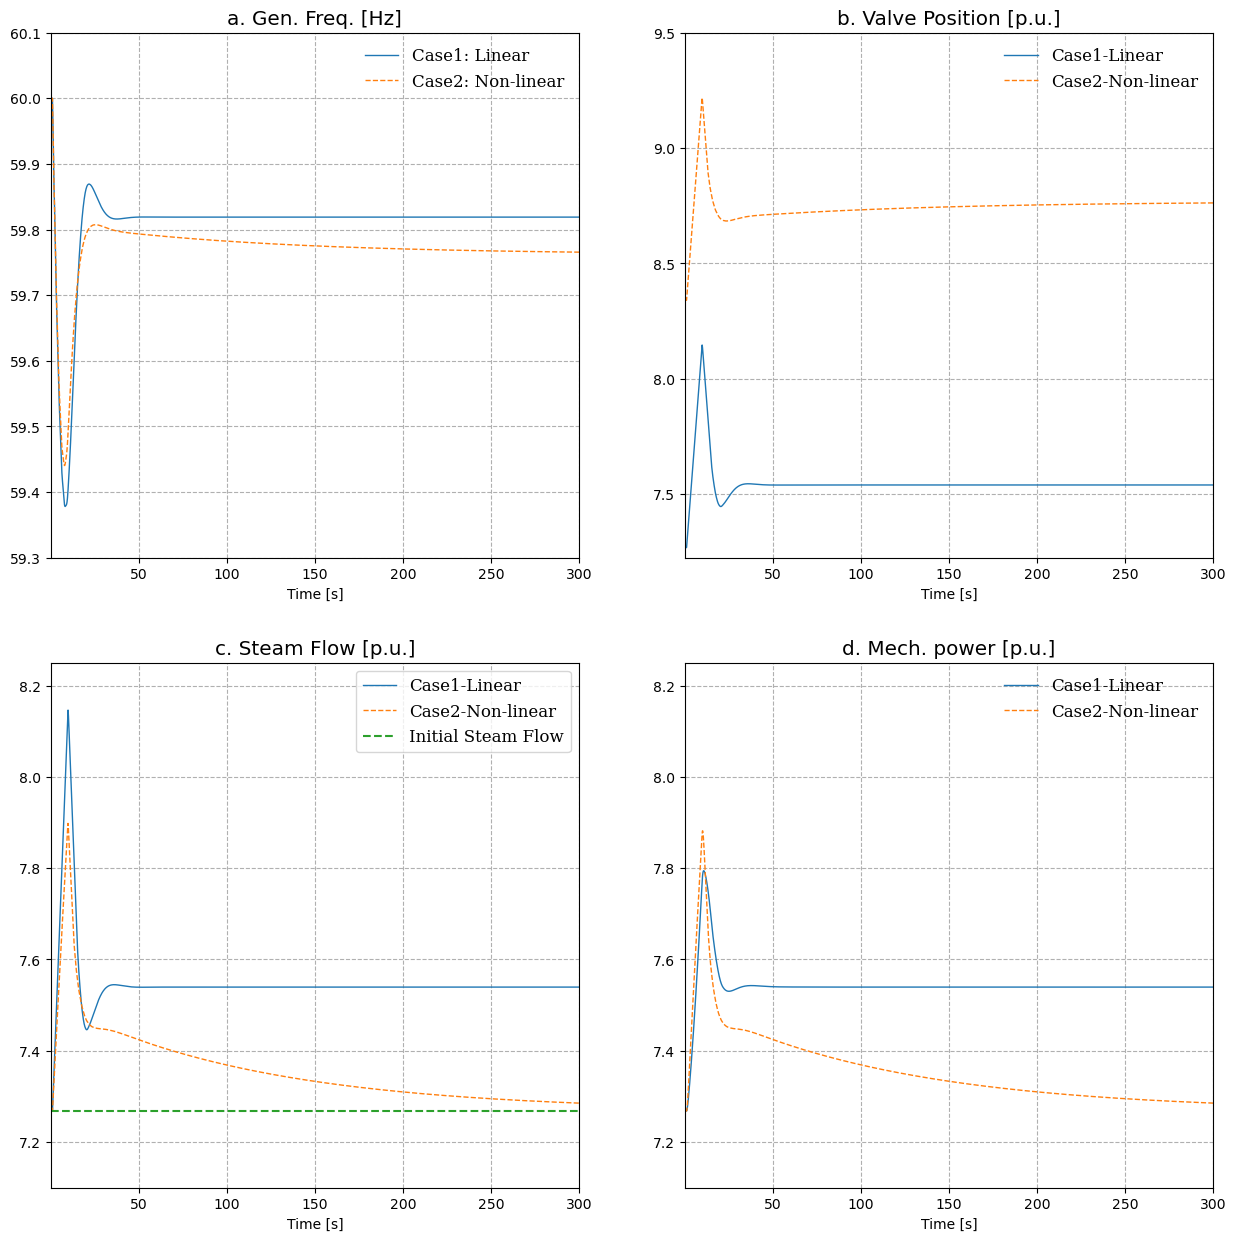

In [7]:
plt.style.use('default')

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

a=(3,)
fmin, fmax = 59.3, 60.1
_ = s1.TDS.plt.plot(s1.GENROU.omega,
                    a=a,
                    ymin=fmin, ymax=fmax,
                    ytimes=s1.config.freq,
                    grid=True, show=False, latex=False,
                    yheader=['Case1: Linear'],
                    title='a. Gen. Freq. [Hz]',
                    fig=fig, ax=ax[0, 0])
_ = s2.TDS.plt.plot(s2.GENROU.omega,
                    a=a,
                    ytimes=s1.config.freq,
                    grid=True, show=False, latex=False,
                    yheader=['Case2: Non-linear'],
                    linestyles=['--'],
                    fig=fig, ax=ax[0, 0])

a= (0,)
_ = s1.TDS.plt.plot(s1.IEEEG1.IAW_y,
                    a=a,
                    grid=True, show=False, latex=False,
                    ymax=9.5,
                    yheader=['Case1-Linear']*len(a),
                    title='b. Valve Position [p.u.]',
                    fig=fig, ax=ax[0, 1])
_ = s2.TDS.plt.plot(s2.IEEEG1NL.IAW_y,
                    grid=True, show=False, latex=False,
                    yheader=['Case2-Non-linear']*len(a),
                    linestyles=['--'],
                    fig=fig, ax=ax[0, 1])
a= (0,)
pmin, pmax = 7.1, 8.25
_ = s1.TDS.plt.plot(s1.IEEEG1.GV,
                    a=a,
                    grid=True, show=False, latex=False,
                    yheader=['Case1-Linear']*len(a),
                    ymin=pmin, ymax=pmax,
                    title='c. Steam Flow [p.u.]',
                    fig=fig, ax=ax[1, 0])
_ = s2.TDS.plt.plot(s2.IEEEG1NL.GV,
                    grid=True, show=False, latex=False,
                    yheader=['Case2-Non-linear']*len(a),
                    linestyles=['--'],
                    fig=fig, ax=ax[1, 0])

_ = ax[1, 0].axhline(y=s2.IEEEG1NL.tm012.v[0], color='tab:green',
                     label='Initial Steam Flow', linestyle='--')
_ = ax[1, 0].legend(loc='upper right')

_ = s1.TDS.plt.plot(s1.IEEEG1.pout,
                    a=a,
                    grid=True, show=False, latex=False,
                    ymin=pmin, ymax=pmax,
                    yheader=['Case1-Linear']*len(a),
                    title='d. Mech. power [p.u.]',
                    fig=fig, ax=ax[1, 1])
_ = s2.TDS.plt.plot(s2.IEEEG1NL.pout,
                    grid=True, show=False, latex=False,
                    yheader=['Case2-Non-linear']*len(a),
                    linestyles=['--'],
                    fig=fig, ax=ax[1, 1])